By: Daniel Shackelford

Exploratory EDA

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

In [2]:
trend_videos = pd.read_csv(r'C:\Users\Dshac\OneDrive\Documents\CSPB4502\FinalProject\MRDVGroupProjectCSPB4502\dataset\archive\US_youtube_trending_data.csv')
# need the r to convert to a normal string

In [3]:
trend_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56391 entries, 0 to 56390
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           56391 non-null  object
 1   title              56391 non-null  object
 2   publishedAt        56391 non-null  object
 3   channelId          56391 non-null  object
 4   channelTitle       56391 non-null  object
 5   categoryId         56391 non-null  int64 
 6   trending_date      56391 non-null  object
 7   tags               56391 non-null  object
 8   view_count         56391 non-null  int64 
 9   likes              56391 non-null  int64 
 10  dislikes           56391 non-null  int64 
 11  comment_count      56391 non-null  int64 
 12  thumbnail_link     56391 non-null  object
 13  comments_disabled  56391 non-null  bool  
 14  ratings_disabled   56391 non-null  bool  
 15  description        55900 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [4]:
trend_videos.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [5]:
trend_videos.isnull().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          491
dtype: int64

In [6]:
# there are empty descriptions in the data set...
trend_videos["description"] = trend_videos["description"].fillna(value="Video has no description")

In [7]:
# numerical columns...
trend_videos.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,56391.00,56391.00,56391.00,56391.00,56391.00
mean,18.62,2774104.35,152217.89,3419.31,15757.57
std,7.05,6495728.16,431041.45,15311.90,112172.57
min,1.00,0.00,0.00,0.00,0.00
25%,10.00,552122.50,21002.50,394.00,1912.00
50%,20.00,1140492.00,53286.00,925.00,4370.00
75%,24.00,2554232.00,133557.00,2517.00,10467.50
max,29.00,264407389.00,16021534.00,879354.00,6738537.00


In [8]:
# non-numerical columns...
trend_videos.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,56391,56391,56391,56391,56391,56391,56391,56391,56391
unique,9840,10048,9656,3216,3252,280,7889,9840,10529
top,wY6UyatwVTA,Starlink Mission,2021-02-26T05:00:12Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,2021-03-02T00:00:00Z,[None],https://i.ytimg.com/vi/wY6UyatwVTA/default.jpg,Video has no description
freq,34,77,34,410,410,400,7347,34,491


In [9]:
#ratio of videos published by year
trend_videos["publishedAt"].apply(lambda x: x[:4]).value_counts(normalize=True)

2020   0.51
2021   0.49
Name: publishedAt, dtype: float64

In [10]:
# Ratio of videos with comments disabled and enabled
trend_videos["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

In [11]:
# Ratio of videos with ratings disabled and enabled
trend_videos["ratings_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: ratings_disabled, dtype: float64

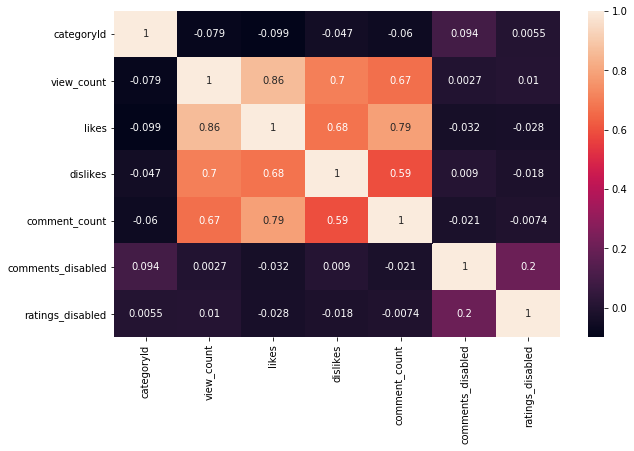

In [12]:
figure = plt.subplots(figsize=(10,6))
corr_map = sns.heatmap(trend_videos.corr(), annot=True)

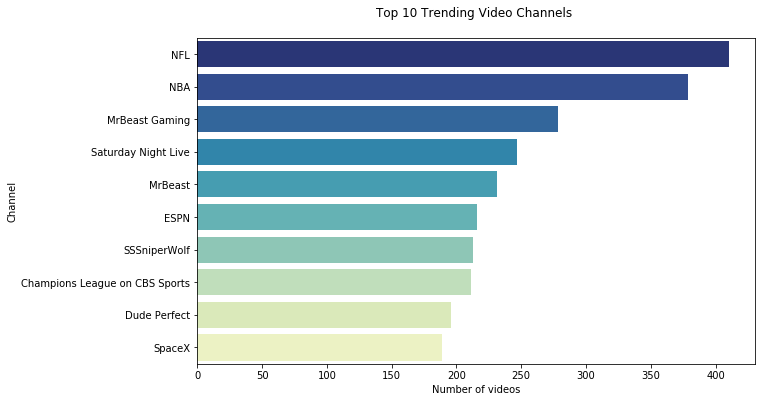

In [13]:
# Top 10 Channels having highest trending videos

videos_by_channel = trend_videos.groupby("channelTitle").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbc_plot = sns.barplot(x="no_of_videos", y="channelTitle", data=videos_by_channel, palette="YlGnBu_r")
vbc_plot = ax.set(xlabel="Number of videos", ylabel="Channel")
plt.title("Top 10 Trending Video Channels \n")
plt.show()

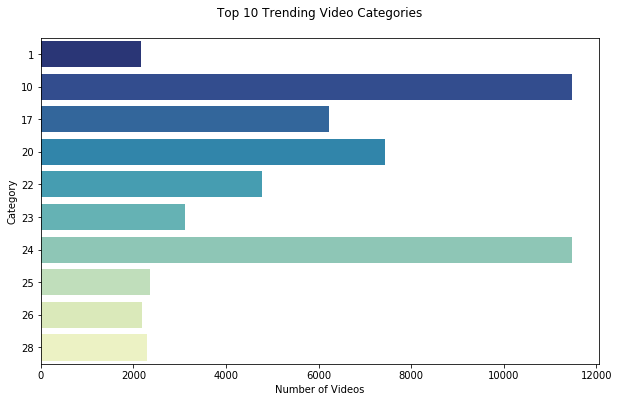

In [14]:
# Top 10 Categories having highest trending videos
# category names are not available in dataset 

videos_by_category = trend_videos.groupby("categoryId").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbcat_plot = sns.barplot(x="no_of_videos", y="categoryId", data=videos_by_category, palette="YlGnBu_r", orient = 'h')
vbcat_plot = ax.set(xlabel="Number of Videos", ylabel="Category")
plt.title("Top 10 Trending Video Categories\n")
plt.show()

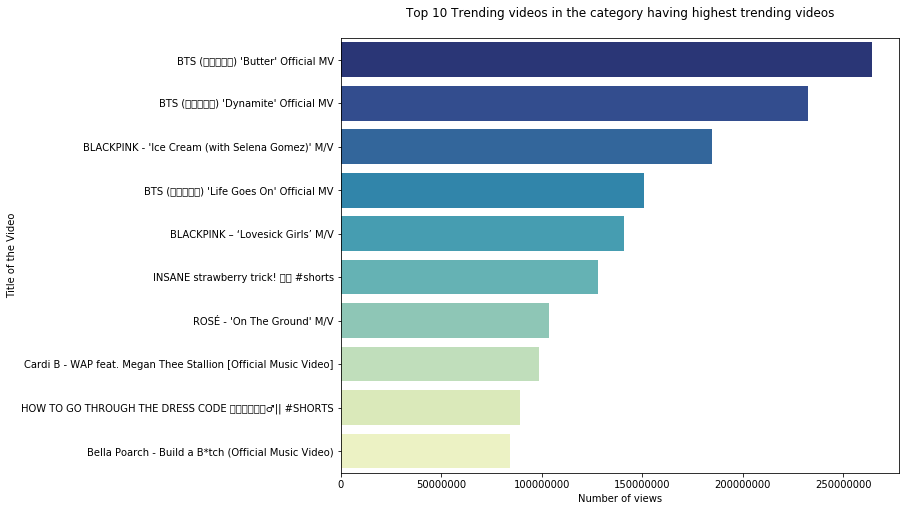

In [15]:
# top 10 videos
# From the previous plot, it seems that category 10 hosted the highest number of trending videos
category10_videos = trend_videos[["title","view_count"]].sort_values(by="view_count",ascending=False).drop_duplicates("title",keep="first")
category10_top10 = category10_videos.nlargest(10, ["view_count"])

fig, ax = plt.subplots(figsize=(10,8))
top10_plot = sns.barplot(data=category10_top10, x='view_count', y='title', palette="YlGnBu_r", ax=ax, ci=None)
top10_plot = ax.set(xlabel="Number of views", ylabel="Title of the Video")
plt.ticklabel_format(axis="x", style="plain")
plt.title("Top 10 Trending videos in the category having highest trending videos\n")
plt.show()

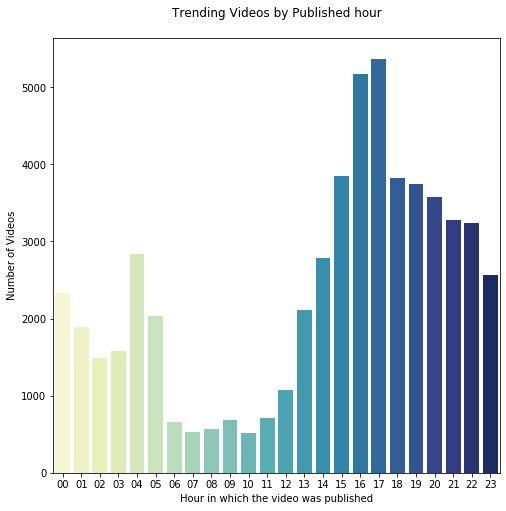

In [16]:
# video publishing hour impact on trending videos
# extract published hour from the publishedAt 
trend_videos["publish_hour"] = trend_videos["publishedAt"].apply(lambda x: x[11:13])

# plot no of videos published by hour 
videos_by_pub_hour = trend_videos.groupby("publish_hour").size().reset_index(name="no_of_videos")
    
fig, ax = plt.subplots(figsize=(8,8))
vph_plot = sns.barplot(x="publish_hour", y="no_of_videos", data=videos_by_pub_hour,palette="YlGnBu")
vph_plot = ax.set(xlabel="Hour in which the video was published", ylabel="Number of Videos")
plt.title("Trending Videos by Published hour\n")
plt.show()

In [ ]:
# video published by hour and category
# plot videos published by hour and category
videos_by_cat_pub_hour=trend_videos.groupby(["categoryId","publish_hour"]).count()["video_id"].unstack()

fig, ax = plt.subplots(figsize=(10,8))
vcph_plot = sns.heatmap(videos_by_cat_pub_hour, cmap="YlGnBu")
vcph_plot = ax.set(xlabel="Hour in which video was published", ylabel="Category")
plt.title("Trending Videos by Category & Publish hour\n")
plt.show()